# PHY480/905 Semester Project 

#### PHY 480/905 Semester Project
### &#9989; Dhiti Doddamreddy
#### &#9989; Last Updated on 4/6/24

# Exploring Electrostatic Potential in Rectangular Geometries through the Poisson Equation

##  Introduction 

In electrostatics, the potential at any point in space is related to the charge distribution within that region. This relationship is established by the Poisson equation. How does the known charge distribution within a rectangular pipe affect the electrostatic potential and electric field, and what can it tell us about the practical applications in electronics? Understanding the behavior of electrostatic potential within geometries has tangible implications for the functionality of electronics. By exploring how various charge distributions influence the potential and within a rectangular pipe as well as it's field, we can learn more about preicting how matireials will behave under different charging conditions, and can optimize the design of circuit components. Some other questions that are addresses are: In what ways do changes in the districution of charge alter the electric fields and how would charged particles move within these fields.



## Methodology:

### Explanation of Equation

This is Poisson Equation:
$$\nabla^2 \Phi = -\frac{\rho}{\epsilon_0}$$

$$\nabla^2$$ is the Laplacian operator which in Cartesian coordinates when looking at a 3 dimensional space is defines as:

$$\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} +\frac{\partial^2}{\partial z^2} $$


In this case we are looking at a 2-dimensional problem where the rectangular pipe would only use x and y components so we adjust this equation to be:

$$\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$$

Looking at the rest of the variables in the Poisson Equations
Where:

- \( $\Phi$ ) is the electric potential at any point in the field
- \( $\rho$ ) is the charge density which indicates how much electric charge is distributed within a region of space.
- \( $\epsilon_0$ ) is the vacuum permittivity, approximately \( $ 8.85 \times 10^{-12} \ \text{F/m} \$). It determines the ability of a vacuum to permit electric field lines.

### Part 1: Setting Up Problem
Let's first define the geometry and potential charge distribution  within the rectangular pipe we are looking at.

Let's consider a rectangular pipe lying in the $xy$-plane, with lenght $L$ along the $x$-axis and height $H$ along the $y$-axis. The corner of our rectangular pipe, according to our axis, are located at coordinates: $(0,0)$, $(L,0)$, $(L,H)$, and $(0,H)$.

To start of with a uniform charge distribution within the pip. This means $\rho$, the charge density, is constant throughout the volume of the pipe.

$$\rho(x, y) = \rho_0$$

where ( $\rho_0$ ) is a constant value.
I choose $\rho_0 = -8.85 \times 10^{-12} \ \text{C/m}^2$ to have the same magnitude as the vacuum permittivity $\epsilon_0 = 8.85 \times  10^{-12} \ \text{F/m}$ to keep the numbers in the same range for calculations.



### Part 1.1: Defining the Problem Parameters in Code

In [1]:
import numpy as np

#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)
rho_0 = -8.85e-12  # uniform charge density (Coulombs per meter squared)
epsilon_0 = 8.85e-12  # vacuum permittivity (Farads per meter)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

### Part 1.2: Defining the Boundary Conditions
To solve the Poisson Equations, we must specificy the boundary conditions. To begin let's assuming these conditions:

Three of the sides are grounded, which means the potential $\Phi$ is set to zero on 3 sides of pipe representing grounded boundaries. This is how it would look mathematically:

- $\Phi(0,y) = 0$ for the left side
- $\Phi(L,y) = 0$ for the right side
- $\Phi(x,0) = 0$ for the bottom side

For the fourth side, the top side of the pipe, has a specific potential of $V_0$. This then means $\Phi(x,H) = V_0$

In [2]:
#Initializing potential array
potential = np.zeros((Ny, Nx))

#Boundary conditions
V_0 = 1 #top side of pipe

#Applying boundary contitions
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

# Initializing the charge density array
charge_density = np.full((Ny, Nx), rho_0)

__say something here__

In [3]:
precision = 1e-6  # Convergence criterion for stopping the iteration
delta_V = 1.0  # Initialize the change in potential to a high value

while delta_V > precision:
    old_potential = potential.copy()
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            # Update the potential at each point based on the average of neighbors and the charge density
            potential[i, j] = ((old_potential[i+1, j] + old_potential[i-1, j] + old_potential[i, j+1] + old_potential[i, j-1]) / 4
                               + (charge_density[i, j] * dx**2) / epsilon_0)

    # Calculate the maximum difference in potential from the previous iteration
    delta_V = np.max(np.abs(potential - old_potential))

Now the potential distribution within the rectangular pipe can be visualized to show help the uniform charge density and boundary conditions shape the elctrostatic environment inside the pipe.

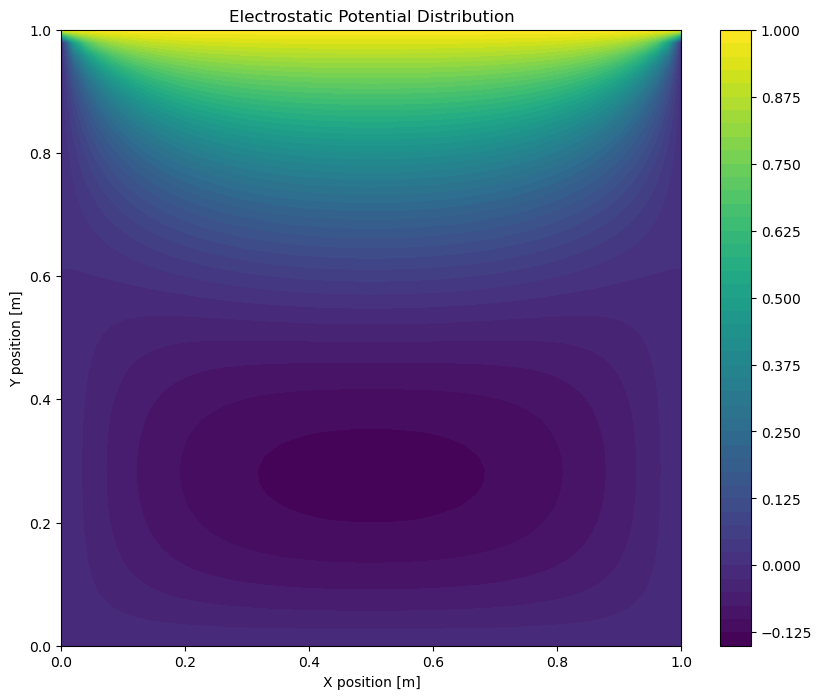

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(0, L, Nx)
y = np.linspace(0, H, Ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, potential, cmap="viridis", levels=50)
plt.colorbar(contour)
plt.title('Electrostatic Potential Distribution')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.show()

__Put something here__

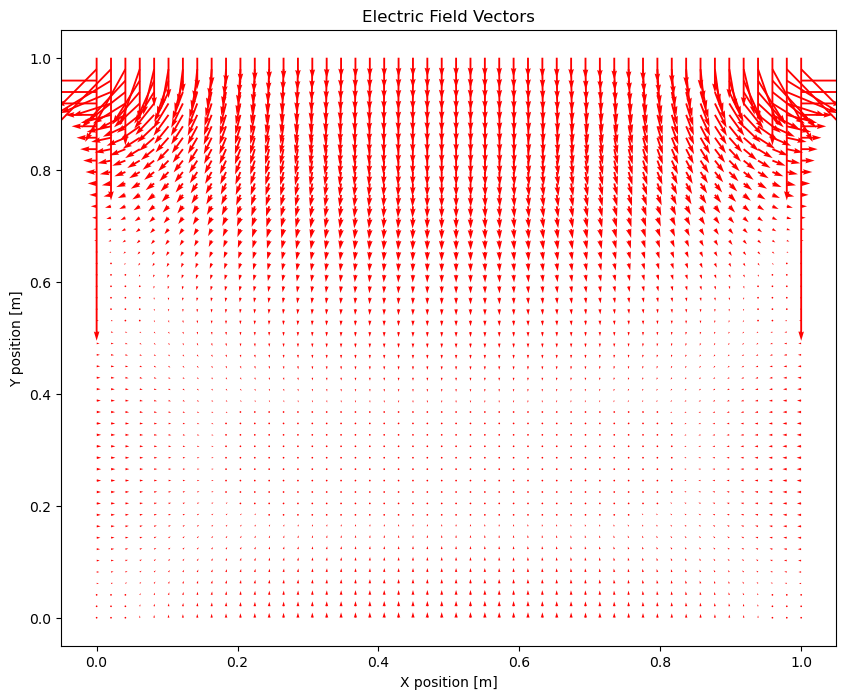

In [5]:
# Compute the gradient of the potential
Ey, Ex = np.gradient(potential, dy, dx)  # Note the order of outputs (gradient in y, gradient in x)

# Negate to get the electric field (since E = -grad(Phi))
Ex = -Ex  # Electric field component in the x-direction
Ey = -Ey  # Electric field component in the y-direction

# Visualization of the Electric Field
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, Ex, Ey, color='r')#explain this
plt.title('Electric Field Vectors')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.show()

changing the rho_0

In [14]:
#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)
rho_0 = -4500  # uniform charge density (Coulombs per meter squared)
epsilon_0 = 8.85e-12  # vacuum permittivity (Farads per meter)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

In [15]:
precision = 1e-6  # Convergence criterion for stopping the iteration
delta_V = 1.0  # Initialize the change in potential to a high value

while delta_V > precision:
    old_potential = potential.copy()
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            # Update the potential at each point based on the average of neighbors and the charge density
            potential[i, j] = ((old_potential[i+1, j] + old_potential[i-1, j] + old_potential[i, j+1] + old_potential[i, j-1]) / 4
                               + (charge_density[i, j] * dx**2) / epsilon_0)

    # Calculate the maximum difference in potential from the previous iteration
    delta_V = np.max(np.abs(potential - old_potential))

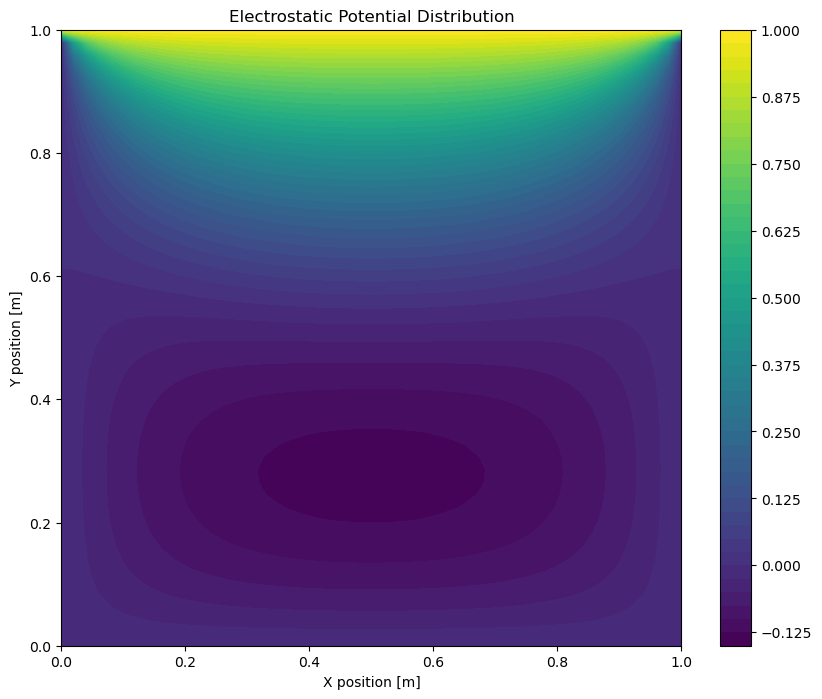

In [16]:
import matplotlib.pyplot as plt

x = np.linspace(0, L, Nx)
y = np.linspace(0, H, Ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, potential, cmap="viridis", levels=50)
plt.colorbar(contour)
plt.title('Electrostatic Potential Distribution')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.show()

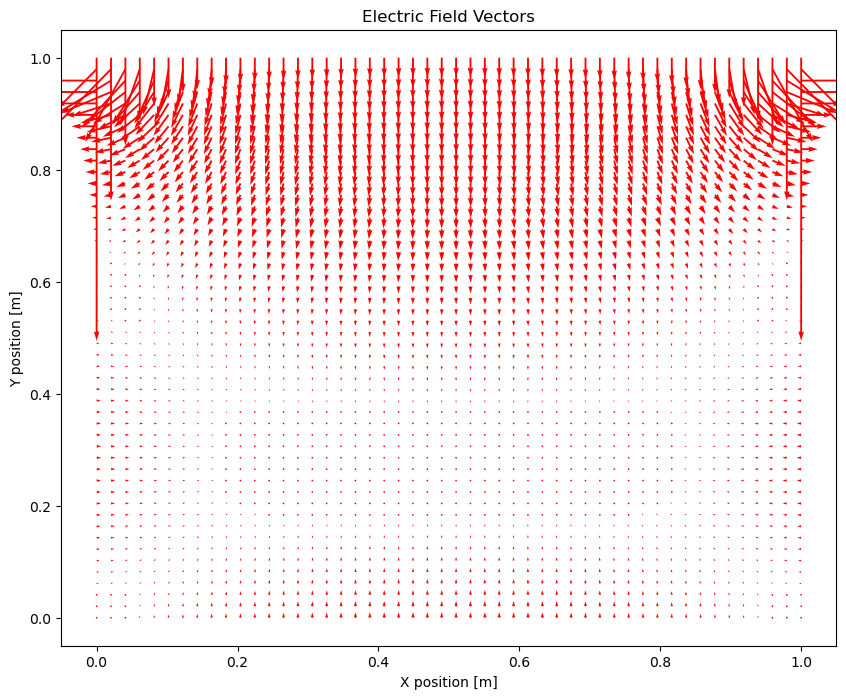

In [17]:
# Compute the gradient of the potential
Ey, Ex = np.gradient(potential, dy, dx)  # Note the order of outputs (gradient in y, gradient in x)

# Negate to get the electric field (since E = -grad(Phi))
Ex = -Ex  # Electric field component in the x-direction
Ey = -Ey  # Electric field component in the y-direction

# Visualization of the Electric Field
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, Ex, Ey, color='r')#explain this
plt.title('Electric Field Vectors')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem setup (same as before)
L = H = 1.0
rho_0 = -8.85e-12
epsilon_0 = 8.85e-12
Nx = Ny = 50
dx = dy = L / (Nx - 1)
V0 = 1.0

# Initialize arrays
potential = np.zeros((Ny, Nx))
charge_density = np.full((Ny, Nx), rho_0)

# Apply boundary conditions
potential[-1, :] = V0  # Top side at V0
# Left and right sides remain grounded (potential = 0), no need to set explicitly due to initialization

# Start iteration with mixed boundary conditions
precision = 1e-5
delta_V = 1.0

while delta_V > precision:
    old_potential = np.copy(potential)
    for i in range(1, Ny-1):
        for j in range(1, Nx-1):
            if j == 1:  # Neumann BC at the bottom (derivative w.r.t y is zero)
                potential[i, j] = (old_potential[i, j+1] + old_potential[i, j-1] +
                                   2 * old_potential[i-1, j] + charge_density[i, j] * dx**2 / epsilon_0) / 4
            else:
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1] +
                                          charge_density[i, j] * dx**2 / epsilon_0)
    
    # Neumann BC for the bottom row (i=0), approximating the derivative as the difference
    potential[0, :] = potential[1, :]  # This approximates dPhi/dy = 0 by setting Phi[0, :] = Phi[1, :]
    
    delta_V = np.max(np.abs(potential - old_potential))

# Visualization
x = np.linspace(0, L, Nx)
y = np.linspace(0, H, Ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, potential, cmap="viridis", levels=50)
plt.colorbar()
plt.title('Electrostatic Potential Distribution with Mixed BCs')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.show()

In [ ]:
# Assuming 'potential' is your 2D array from the latest simulation with mixed boundary conditions

# Compute the gradient of the potential to get the electric field components
Ey, Ex = np.gradient(potential, dy, dx)  # Note: np.gradient returns the gradient in y first

# The electric field is the negative gradient of the potential
Ex = -Ex  # Electric field component in the x-direction
Ey = -Ey  # Electric field component in the y-direction

# Visualization of the Electric Field using quiver plot
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, Ex, Ey, color='red')
plt.title('Electric Field Vectors')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.xlim(0, L)
plt.ylim(0, H)
plt.show()


drastic boundary condition change

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = H = 1.0  # Length and height of the pipe in meters
rho_0 = -8.85e-12  # Uniform charge density in C/m^2
epsilon_0 = 8.85e-12  # Vacuum permittivity in F/m
V0 = 1.0  # Fixed potential in volts

# Mesh size
Nx, Ny = 50, 50
dx, dy = L / (Nx - 1), H / (Ny - 1)

# Initialize the potential array
potential = np.zeros((Ny, Nx))

# Apply new boundary conditions
potential[:, 0] = 0    # Left side grounded
potential[:, -1] = 0   # Right side grounded
potential[0, :] = V0   # Bottom side at fixed potential V0

# Charge density
charge_density = np.full((Ny, Nx), rho_0)

# Iteration parameters
precision = 1e-5
delta_V = 1.0

while delta_V > precision:
    old_potential = np.copy(potential)
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            potential[i, j] = (old_potential[i+1, j] + old_potential[i-1, j] +
                               old_potential[i, j+1] + old_potential[i, j-1] +
                               charge_density[i, j] * dx**2 / epsilon_0) / 4

    # Implementing the insulated top boundary condition by approximating the derivative as a difference
    potential[-1, :] = potential[-2, :]  # This mimics the effect of insulation

    delta_V = np.max(np.abs(potential - old_potential))

# Visualization
x = np.linspace(0, L, Nx)
y = np.linspace(0, H, Ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, potential, cmap="viridis", levels=50)
plt.colorbar()
plt.title('Electrostatic Potential with Modified Boundary Conditions')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.show()


In [ ]:
# Assuming 'potential' is your 2D array from the latest simulation

# Compute the gradient of the potential to get the electric field components
Ey, Ex = np.gradient(potential, dy, dx)  # Note: np.gradient returns the gradient in y first

# The electric field is the negative gradient of the potential
Ex = -Ex  # Electric field component in the x-direction
Ey = -Ey  # Electric field component in the y-direction

# Visualization of the Electric Field
plt.figure(figsize=(10, 8))
# Quiver plot for the electric field vectors
# Note: Skipping some vectors for clarity in visualization
skip = (slice(None, None, 5), slice(None, None, 5))  # Adjust the step for denser or sparser field
plt.quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color='red')
plt.title('Electric Field Vectors')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.xlim(0, L)
plt.ylim(0, H)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the electric field from potential
def calculate_electric_field(potential, dx, dy):
    Ey, Ex = np.gradient(potential, dy, dx)
    Ex = -Ex  # Electric field is negative gradient of potential
    Ey = -Ey
    return Ex, Ey

# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boundary conditions to be compared
boundary_conditions = ['Grounded', 'V0 Top', 'Insulated Top']
# Assuming 'potentials' is a list containing potential arrays for each boundary condition
potentials = [potential_ground, potential_V0_top, potential_insulated_top]

# Position (i, j) in the grid where we want to calculate the electric field strength
grid_point = (25, 25)  # Middle of the grid as an example

# Loop through each set of boundary conditions
for i, bc in enumerate(boundary_conditions):
    potential = potentials[i]
    Ex, Ey = calculate_electric_field(potential, dx, dy)
    
    # Calculate the electric field strength at the specified point
    E_strength = np.sqrt(Ex[grid_point]**2 + Ey[grid_point]**2)
    print(f"Electric field strength at {grid_point} for {bc}: {E_strength:.2e} V/m")
    
    # Plot the electric field for this boundary condition
    axes[i].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color='red')
    axes[i].set_title(f'Electric Field - {bc}')
    axes[i].set_xlabel('X position [m]')
    axes[i].set_ylabel('Y position [m]')

plt.tight_layout()
plt.show()


## Results and Discussion

In [ ]:
def runge_kutta_step(x, y, vx, vy, q, m, dt, Ex, Ey):
    # Define the derivatives for the system
    def derivatives(state, time):
        x, y, vx, vy = state
        ix, iy = int(x / dx), int(y / dy)
        # Boundary checks can be implemented here if necessary
        ax = q * Ex[iy % Ny, ix % Nx] / m
        ay = q * Ey[iy % Ny, ix % Nx] / m
        return np.array([vx, vy, ax, ay])
    
    # Runge-Kutta 4th-order method
    state = np.array([x, y, vx, vy])
    
    k1 = dt * derivatives(state, 0)
    k2 = dt * derivatives(state + 0.5 * k1, 0.5 * dt)
    k3 = dt * derivatives(state + 0.5 * k2, 0.5 * dt)
    k4 = dt * derivatives(state + k3, dt)
    
    new_state = state + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return new_state

# Initial conditions
x, y = 0.05, 0.05  # Starting position in meters
vx, vy = 0, 0  # Starting velocity in m/s

# Charge and mass of the particle (example: electron)
q = 1.6e-19
m = 9.11e-31

# Time step for the simulation
dt = 1e-11

# Simulation loop
trajectory = []
for _ in range(1000):  # Number of time steps
    x, y, vx, vy = runge_kutta_step(x, y, vx, vy, q, m, dt, Ex, Ey)
    trajectory.append((x, y))
    # Boundary checks can be implemented here to stop the simulation if needed

# Convert the trajectory list to a NumPy array for easier plotting
trajectory = np.array(trajectory)

# Visualization
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, potential, cmap="viridis", levels=50)
plt.colorbar()
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label='Particle Trajectory')
plt.quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color='red')
plt.title('Particle Trajectory in Electric Field with Runge-Kutta Method')
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.legend()
plt.xlim(0, L)
plt.ylim(0, H)
plt.show()


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the force function based on electric field
def force(q, Ex, Ey, x, y):
    ix, iy = int(x / dx), int(y / dy)
    Fx = q * Ex[iy % Ny, ix % Nx]
    Fy = q * Ey[iy % Ny, ix % Nx]
    return Fx, Fy

# Define the Runge-Kutta integration step
def runge_kutta_step(x, y, vx, vy, q, m, dt):
    k1_vx, k1_vy = force(q, Ex, Ey, x, y) / m * dt
    k1_x, k1_y = vx * dt, vy * dt
    
    k2_vx, k2_vy = force(q, Ex, Ey, x + 0.5 * k1_x, y + 0.5 * k1_y) / m * dt
    k2_x, k2_y = (vx + 0.5 * k1_vx) * dt, (vy + 0.5 * k1_vy) * dt
    
    k3_vx, k3_vy = force(q, Ex, Ey, x + 0.5 * k2_x, y + 0.5 * k2_y) / m * dt
    k3_x, k3_y = (vx + 0.5 * k2_vx) * dt, (vy + 0.5 * k2_vy) * dt
    
    k4_vx, k4_vy = force(q, Ex, Ey, x + k3_x, y + k3_y) / m * dt
    k4_x, k4_y = (vx + k3_vx) * dt, (vy + k3_vy) * dt
    
    x += (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
    y += (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
    vx += (k1_vx + 2 * k2_vx + 2 * k3_vx + k4_vx) / 6
    vy += (k1_vy + 2 * k2_vy + 2 * k3_vy + k4_vy) / 6
    
    return x, y, vx, vy

# Particle initial conditions
x, y = 0.05, 0.05  # Starting position in meters
vx, vy = 0, 0  # Starting velocity in m/s
q = 1.6e-19  # Charge of the particle
m = 9.11e-31  # Mass of the particle

# Animation setup
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, L)
ax.set_ylim(0, H)
line, = ax.plot([], [], 'r-', label='Particle Trajectory')
ax.contourf(X, Y, potential, cmap="viridis", levels=50)
ax.quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color='red')

# Initialize the animation function
def init():
    line.set_data([], [])
    return line,

# Animation update function
def animate(i):
    global x, y, vx, vy
    x, y, vx, vy = runge_kutta_step(x, y, vx, vy, q, m, dt)
    line.set_data(x, y)
    return line,

# Create animation
ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

plt.legend()
plt.show()


_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

##  Conclusion and Perspectives

_(What did you learn from your results? 
What obstacles did you run into? 
What would you do differently next time? 
Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

1. 5.15: Poisson’s and Laplace’s Equations. (2020, April 2). Physics LibreTexts. https://phys.libretexts.org/Bookshelves/Electricity_and_Magnetism/Electromagnetics_I_(Ellingson)/05%3A_Electrostatics/5.15%3A_Poisson%E2%80%99s_and_Laplace%E2%80%99s_Equations
2.


**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
